In [56]:
# Importing Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
# Import dataset
dataset = pd.read_csv('flipkart_data.csv', sep = ',')
dataset.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [25]:
# library to clean data
import re
 
# Natural Language Tool Kit
import nltk
 
# to remove stopword
from nltk.corpus import stopwords
 
# for Stemming propose
from nltk.stem.porter import PorterStemmer
 
# Initialize empty array
# to append clean text
corpus = []

# 1000 (reviews) rows to clean
for i in range(len(dataset['rating'])):
     
    # column : "Review", row ith
    review = re.sub('[^a-zA-Z]', ' ', dataset['review'][i])
     
    # convert all cases to lower cases
    review = review.lower()
     
    # split to array(default delimiter is " ")
    review = review.split()
     
    # creating PorterStemmer object to
    # take main stem of each word
    ps = PorterStemmer()
     
    # loop for stemming each word
    # in string array at ith row   
    review = [ps.stem(word) for word in review
                if not word in set(stopwords.words('english'))]
                 
    # rejoin all string array elements
    # to create back into a string
    review = ' '.join(review) 
     
    # append each string to create
    # array of clean text
    corpus.append(review)

In [46]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
 
# To extract max 1500 feature.
# "max_features" is attribute to
# experiment with to get better results
cv = CountVectorizer(max_features = 1500)
 
# X contains corpus (dependent variable)
X = cv.fit_transform(corpus).toarray()
 
# y contains answers if review
# is positive or negative
pos_neg = []
for i in range(len(dataset['rating'])):
    if dataset['rating'][i] >= 4:
        pos_neg.append(1)
    else:
        pos_neg.append(0)
  
dataset['label'] = pos_neg
y = dataset.iloc[:, 2].values

In [47]:
dataset.head()

,review,rating,label
0,It was nice produt. I like it's design a lot. ...,5,1
1,awesome sound....very pretty to see this nd th...,5,1
2,awesome sound quality. pros 7-8 hrs of battery...,4,1
3,I think it is such a good product not only as ...,5,1
4,awesome bass sound quality very good bettary l...,5,1


In [48]:
# Splitting the dataset into
# the Training set and Test set
from sklearn.model_selection import train_test_split
 
# experiment with "test_size"
# to get better results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

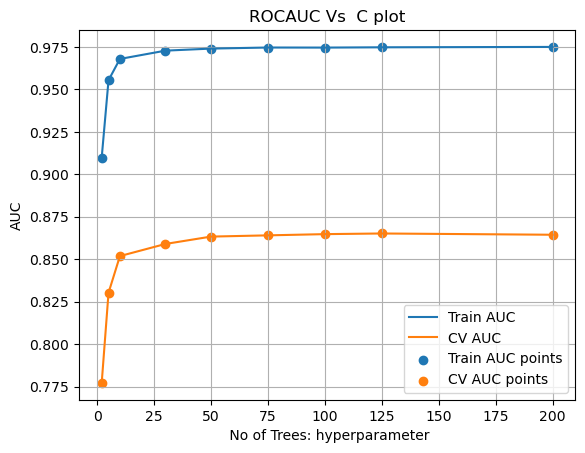

{'n_estimators': 125}
0.8651723169132796


In [65]:
neigh = RandomForestClassifier(criterion= 'entropy', max_samples=0.5,max_features=0.5)

n_estimators=np.array([2,5,10,30,50,75,100,125,200]) # no of trees
tuned_parameters = {'n_estimators' : n_estimators} 


clf = GridSearchCV(neigh, tuned_parameters, cv=5, scoring='roc_auc',return_train_score='true') 
clf.fit(X_train, y_train)

results = pd.DataFrame.from_dict(clf.cv_results_)#please check the output of cv_results_
#  gridsearchcv execution will understand. concepts required KFold cross validation
results = results.sort_values(['param_n_estimators'])

train_auc= results['mean_train_score']

cv_auc = results['mean_test_score'] 

k =  results['param_n_estimators']

#alpha1=[]
#for i in range(0,len(k),1):
#   l=math.log10(k[i])
#   alpha1.append(l)
#alpha1.sort()
plt.plot(k, train_auc, label='Train AUC')

plt.plot(k, cv_auc, label='CV AUC')

plt.scatter(k, train_auc, label='Train AUC points')
plt.scatter(k, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel(" No of Trees: hyperparameter")
plt.ylabel("AUC")
plt.title("ROCAUC Vs  C plot")
plt.grid()
plt.show()


print(clf.best_params_)
print(clf.best_score_)
#print("best C log value")
#a=math.log10(clf.best_params_.get('C'))
#print(a)

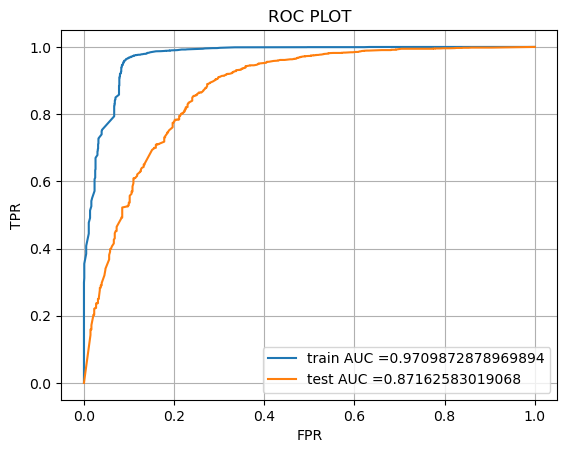

---------------------------------------------------
the maximum value of tpr*(1-fpr) 0.8739079275846535 for threshold 0.659
Train confusion matrix


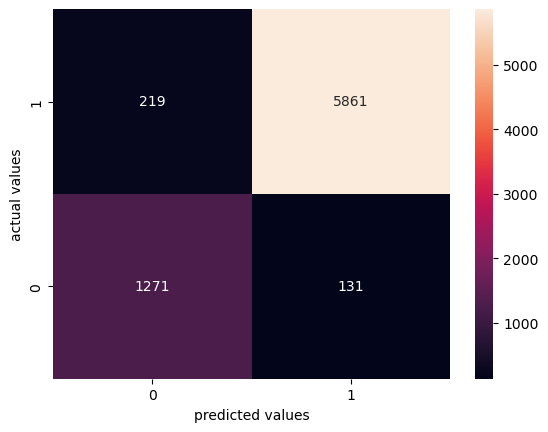

Test confusion matrix


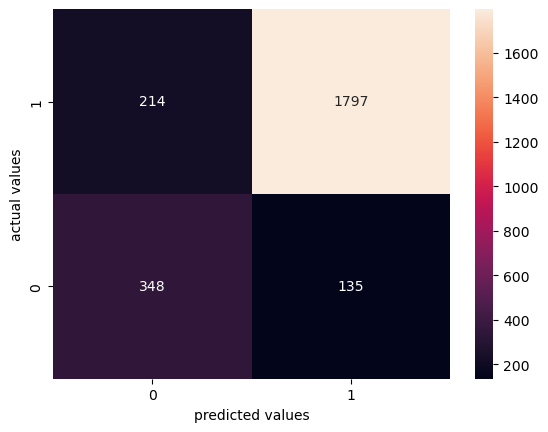

In [66]:
import numpy as np
from sklearn.metrics import roc_curve, auc
import seaborn as sns

neigh = RandomForestClassifier(n_estimators = 125,max_samples=0.5,max_features=0.5)
neigh.fit(X_train, y_train)



y_train_pred = neigh.predict_proba(X_train)[:,1]    
y_test_pred = neigh.predict_proba(X_test)[:,1]
#print(y_test_pred)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC PLOT")
plt.grid()
plt.show()


def bestthreshold(threshould, fpr, tpr):# function to predict best threshold
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predictusingbestt(proba, threshould):#prediction using best threshold
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

print("---------------------------------------------------")


from sklearn.metrics import confusion_matrix
best_t = bestthreshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")

ax=sns.heatmap(confusion_matrix(y_train, predictusingbestt(y_train_pred, best_t)),annot=True,fmt='d')
ax.set_ylim([0,2])
plt.ylabel('actual values')
plt.xlabel('predicted values')
plt.show()
print("Test confusion matrix")


bx=sns.heatmap(confusion_matrix(y_test, predictusingbestt(y_test_pred, best_t)),annot=True,fmt='d')
bx.set_ylim([0,2])

plt.ylabel('actual values')
plt.xlabel('predicted values')
plt.show()

In [53]:
import math
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

l=[0.5,0.5]# Taking equal prior probability values

neigh = MultinomialNB(fit_prior=False, class_prior=l)#Taking Model Multinomial Naive Bayes


alphas=np.array([0.0001,0.001,0.01,0.1,1,10,100,1000,10000]) # Different alpha values
tuned_parameters = {'alpha' : alphas} # alpha values in a dictionary


classifier = GridSearchCV(neigh, tuned_parameters, cv=5, scoring='roc_auc',return_train_score='true') 
classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=MultinomialNB(class_prior=[0.5, 0.5], fit_prior=False),
             param_grid={'alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03,
       1.e+04])},
             return_train_score='true', scoring='roc_auc')

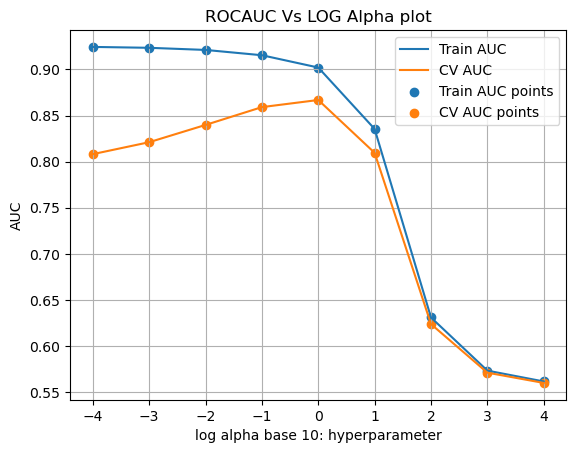

{'alpha': 1.0}
0.8668605981005673
best alpha log value
0.0


In [57]:
results = pd.DataFrame.from_dict(classifier.cv_results_)#please check the output of cv_results_
#  gridsearchcv execution will understand. concepts required KFold cross validation
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']

cv_auc = results['mean_test_score'] 

k =  results['param_alpha']

# alpha value is taken as log alpha value
alpha1=[]
for i in range(0,len(k),1):
   l=math.log10(k[i])
   alpha1.append(l)
alpha1.sort()
#print(alpha1)

plt.plot(alpha1, train_auc, label='Train AUC')# to connect lines to auc points


plt.plot(alpha1, cv_auc, label='CV AUC')



plt.scatter(alpha1, train_auc, label='Train AUC points')
plt.scatter(alpha1, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("log alpha base 10: hyperparameter")
plt.ylabel("AUC")
plt.title("ROCAUC Vs LOG Alpha plot")
plt.grid()
plt.show()


print(classifier.best_params_)# pick the best alpha value
print(classifier.best_score_)
print("best alpha log value")
a=math.log10(classifier.best_params_.get('alpha'))
print(a)

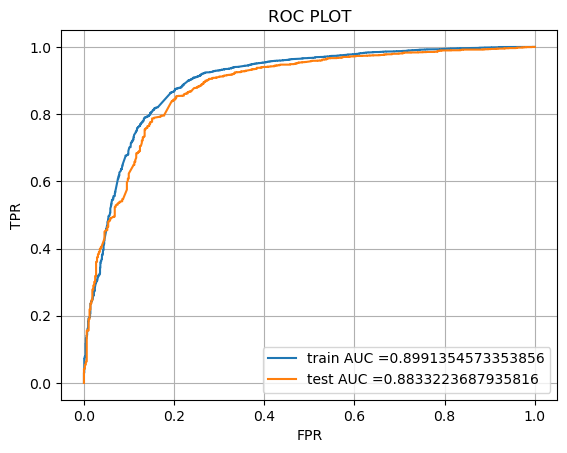

---------------------------------------------------
the maximum value of tpr*(1-fpr) 0.6977614216532771 for threshold 0.622
Train confusion matrix


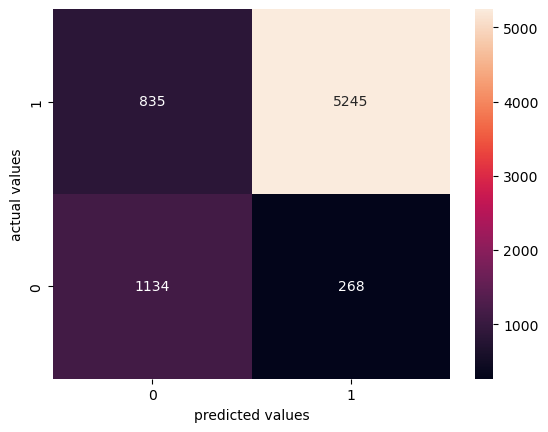

Test confusion matrix


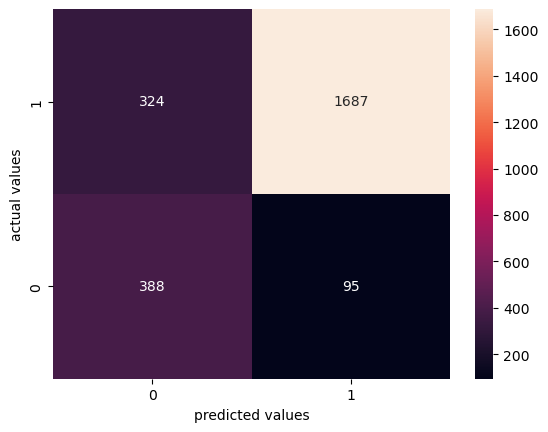

In [60]:
from sklearn.metrics import roc_curve, auc
import seaborn as sns

l=[0.5,0.5]
neigh = MultinomialNB(alpha=1,fit_prior=False,class_prior=l)
neigh.fit(X_train, y_train)



y_train_pred = neigh.predict_proba(X_train)[:,1]    
y_test_pred = neigh.predict_proba(X_test)[:,1]
#print(y_test_pred)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC PLOT")
plt.grid()
plt.show()


def bestthreshold(threshould, fpr, tpr):# function to predict best threshold
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predictusingbestt(proba, threshould):#prediction using best threshold
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

print("---------------------------------------------------")


from sklearn.metrics import confusion_matrix
best_t = bestthreshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")

ax = sns.heatmap(confusion_matrix(y_train, predictusingbestt(y_train_pred, best_t)),annot=True,fmt='d')
ax.set_ylim([0,2])
plt.ylabel('actual values')
plt.xlabel('predicted values')
plt.show()
print("Test confusion matrix")


bx = sns.heatmap(confusion_matrix(y_test, predictusingbestt(y_test_pred, best_t)),annot=True,fmt='d')
bx.set_ylim([0,2])
plt.ylabel('actual values')
plt.xlabel('predicted values')
plt.show()

In [51]:
y_pred = classifier.predict(X_test)
print(y_pred)

dataset.to_csv("c3_Predicted_Sentiments_Fresh_Dump.tsv", sep='\t', encoding='UTF-8', index=False)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

accuracy_score(y_test, y_pred)

[1 1 0 ... 1 1 1]
[[ 298  185]
 [ 126 1885]]


0.8753007217321572

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
model = Sequential()
model.add(Embedding(500, 120, input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(176, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1500, 120)         60000     
                                                                 
 spatial_dropout1d (Spatial  (None, 1500, 120)         0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 176)               209088    
                                                                 
 dense (Dense)               (None, 2)                 354       
                                                                 
Total params: 269442 (1.03 MB)
Trainable params: 269442 (1.03 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [42]:
#Splitting the data into training and testing
y=pd.get_dummies(dataset['label'])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [43]:
batch_size=32
model.fit(X_train, y_train, epochs = 5, batch_size=batch_size, verbose = 'auto')

Epoch 1/5
219/219 [==============================] - 1822s 8s/step - loss: 0.4986 - accuracy: 0.8068
Epoch 2/5
219/219 [==============================] - 2284s 10s/step - loss: 0.4936 - accuracy: 0.8075
Epoch 3/5
219/219 [==============================] - 3658s 17s/step - loss: 0.4929 - accuracy: 0.8075
Epoch 4/5
219/219 [==============================] - 3155s 14s/step - loss: 0.4907 - accuracy: 0.8075
Epoch 5/5
219/219 [==============================] - 2180s 10s/step - loss: 0.4922 - accuracy: 0.8075


In [44]:
model.evaluate(X_test,y_test)

94/94 [==============================] - 103s 1s/step - loss: 0.4723 - accuracy: 0.8192


[0.47234758734703064, 0.819244921207428]